In [1]:
train_dir = 'C:/Users/Mohamed/Desktop/AIDLA/data/Train'
test_dir = 'C:/Users/Mohamed/Desktop/AIDLA/data/Test'

In [2]:
# number of images
import os
print("Training")
print(len(os.listdir('C:/Users/Mohamed/Desktop/AIDLA/data/Train/cars')))
print(len(os.listdir('C:/Users/Mohamed/Desktop/AIDLA/data/Train/bikes')))
print("Testing")
print(len(os.listdir('C:/Users/Mohamed/Desktop/AIDLA/data/Test/cars')))
print(len(os.listdir('C:/Users/Mohamed/Desktop/AIDLA/data/Test/bikes')))

Training
991
1078
Testing
144
144


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [47]:
training_dataset = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    labels='inferred', # bikes class assigned 0, cars class assigned 1
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  # resizing images
)

Found 2069 files belonging to 2 classes.


In [46]:
testing_dataset = keras.utils.image_dataset_from_directory(
    directory = test_dir,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 288 files belonging to 2 classes.


In [42]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

training_dataset = training_dataset.map(process)
testing_dataset = testing_dataset.map(process)


In [7]:
# creation of Convoletional Neural Network model
model = Sequential()

In [8]:
from keras.layers import Input

In [9]:
model.add(Input(shape=(256, 256, 3)))


model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [12]:
from keras.optimizers import Adam

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [14]:
history = model.fit(training_dataset,epochs=10,validation_data=testing_dataset)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 36s 536ms/step - accuracy: 0.6428 - loss: 0.6390 - val_accuracy: 0.8750 - val_loss: 0.3547
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 537ms/step - accuracy: 0.8632 - loss: 0.3390 - val_accuracy: 0.9097 - val_loss: 0.2515
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 36s 544ms/step - accuracy: 0.9261 - loss: 0.2062 - val_accuracy: 0.9271 - val_loss: 0.1838
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 38s 580ms/step - accuracy: 0.9415 - loss: 0.1716 - val_accuracy: 0.9201 - val_loss: 0.2515
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 36s 545ms/step - accuracy: 0.9493 - loss: 0.1310 - val_accuracy: 0.9375 - val_loss: 0.1537
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 543ms/step - accuracy: 0.9720 - loss: 0.0730 - val_accuracy: 0.9132 - val_loss: 0.2926
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 36s 550ms/step - accuracy: 0.9787 - loss: 0.0638 - val_accuracy: 0.9236 - val_loss: 0.2088
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 36s 549ms/step - accuracy: 0.9783 - loss: 0.0642 - val_accu

In [15]:
import matplotlib.pyplot as plt

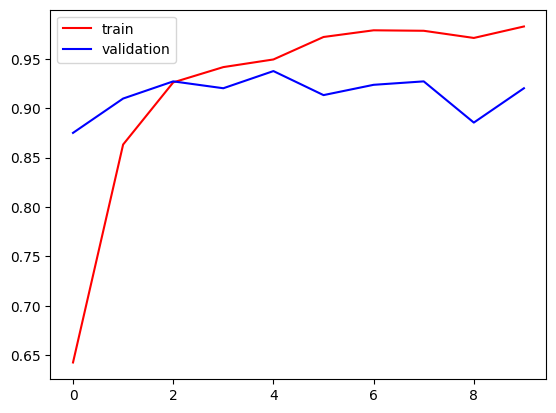

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

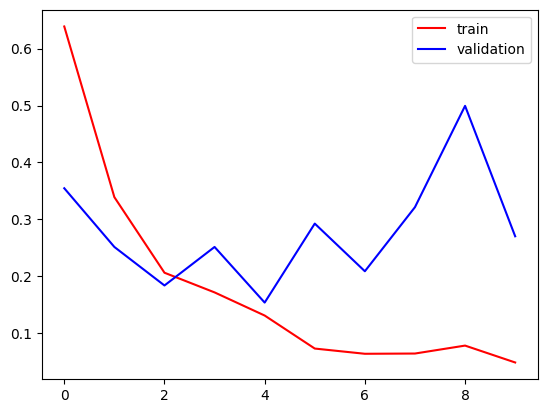

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [53]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

test_images = []
test_labels = []

for images, labels in testing_dataset:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())

test_images = np.vstack(test_images)
test_labels = np.concatenate(test_labels)

y_pred_probs = model.predict(test_images)
y_pred = (y_pred_probs > 0.5).astype(int)

print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=['Bikes', 'Cars']))

cm = confusion_matrix(test_labels, y_pred)

print("Confusion Matrix:")
print(cm)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
Classification Report:
              precision    recall  f1-score   support

       Bikes       0.87      0.95      0.91       144
        Cars       0.95      0.86      0.90       144

    accuracy                           0.91       288
   macro avg       0.91      0.91      0.91       288
weighted avg       0.91      0.91      0.91       288

Confusion Matrix:
[[137   7]
 [ 20 124]]


In [25]:
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[0.]], dtype=float32)

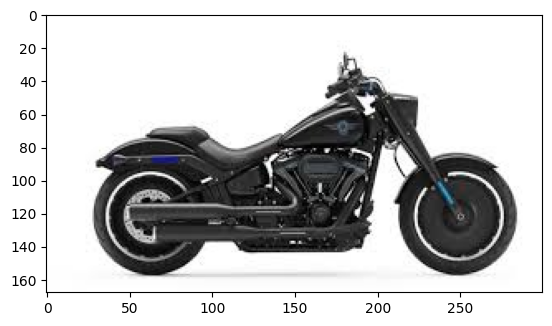

In [26]:
# Testing Bike Image


test_img = cv2.imread(r'C:/Users/Mohamed/Desktop/AIDLA/data/Test/bikes/Bike (807).jpeg')

plt.imshow(test_img)

test_img.shape

test_img = cv2.resize(test_img,(256,256))

test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)  # 0 refering to bike and 1 refering to car

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[1.]], dtype=float32)

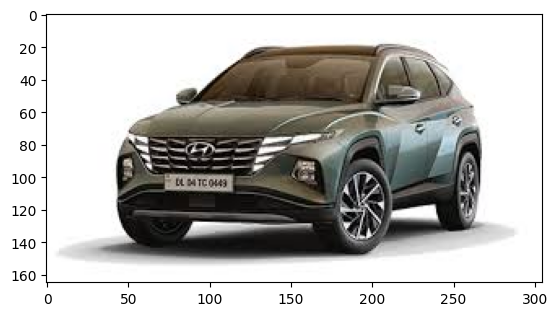

In [27]:
# Test Car Image
test_img2 = cv2.imread(r'C:/Users/Mohamed/Desktop/AIDLA/data/Test/cars/Car (811).jpeg')

plt.imshow(test_img2)

test_img2= cv2.resize(test_img2,(256,256))

test_input = test_img2.reshape((1,256,256,3))
model.predict(test_input)  # 0 refering to bike and 1 refering to car

In [ ]:
#Pre Trained

In [48]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [49]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = resnet_model.fit(training_dataset,epochs=10,validation_data=testing_dataset)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9618 - loss: 0.7591 - val_accuracy: 0.9896 - val_loss: 0.0588
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9913 - loss: 0.0714 - val_accuracy: 0.9896 - val_loss: 0.0725
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9957 - loss: 0.0216 - val_accuracy: 0.9583 - val_loss: 0.3057
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9957 - loss: 0.0197 - val_accuracy: 0.9965 - val_loss: 0.0699
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9990 - loss: 0.0075 - val_accuracy: 0.9861 - val_loss: 0.0477
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9937 - loss: 0.0496 - val_accuracy: 0.9861 - val_loss: 0.1004
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9971 - loss: 0.0108 - val_accuracy: 0.9965 - val_loss: 0.0713
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9952 - loss: 0.0441 - val_accuracy: 0.9792 - val_loss:

In [54]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_true = []
y_pred_probs = []

print("Evaluating model")
for images, labels in testing_dataset:
    preds = resnet_model.predict(images, verbose=0)
    y_pred_probs.extend(preds.flatten())
    
    y_true.extend(labels.numpy().flatten())

y_true = np.array(y_true)
y_pred = (np.array(y_pred_probs) > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Bikes', 'Cars']))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Evaluating model

Classification Report:
              precision    recall  f1-score   support

       Bikes       0.99      0.99      0.99       144
        Cars       0.99      0.99      0.99       144

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288

Confusion Matrix:
[[143   1]
 [  1 143]]
